<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/Banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout

In [3]:
datagen = ImageDataGenerator(rescale=1./255)
generator= datagen.flow_from_directory(
    '/content/drive/MyDrive/Banknotes',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Banknotes',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
class_label=['Elon Musk','Miss TThuy','Misthy','Quan0go','The Weeknd','Tlinh']
X_batch,y_batch= next(generator)
X_batch_flat=X_batch.reshape(X_batch.shape[0],-1)
x_train, y_train = next(generator)
x_test, y_test = next(test_generator)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print('Nhap vao:', X_batch_flat.shape)
print('Ket qua:', y_batch.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Found 24 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
Nhap vao: (24, 3072)
Ket qua: (24, 3)
(24, 3072) (24, 3)
(24, 3072) (24, 3)


In [5]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:%.2f'%(test_acc))
generator.class_indices

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 1.3169 - val_accuracy: 0.3333 - val_loss: 5.4680
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3333 - loss: 5.4680 - val_accuracy: 0.3333 - val_loss: 3.4295
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3333 - loss: 3.4295 - val_accuracy: 0.3333 - val_loss: 1.6194
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3333 - loss: 1.6194 - val_accuracy: 0.3333 - val_loss: 2.4941
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.3333 - loss: 2.4941 - val_accuracy: 0.3333 - val_loss: 1.8911
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3333 - loss: 1.8911 - val_accuracy: 0.3333 - val_loss: 1.6076
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.3333 - loss: 1.6076 - val_accuracy: 0.3333 - val_loss: 1.5805
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3333 - loss: 1.5805 - val_accuracy: 0.5417 - val_l

{'1000': 0, '2000': 1, '5000': 2}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Dự đoán: 1000


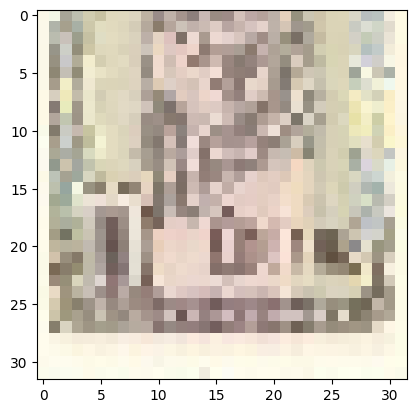

In [6]:
img=load_img('/content/drive/MyDrive/Banknotes/1000/Ảnh chụp màn hình 2025-04-14 015212.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dự đoán: 2000


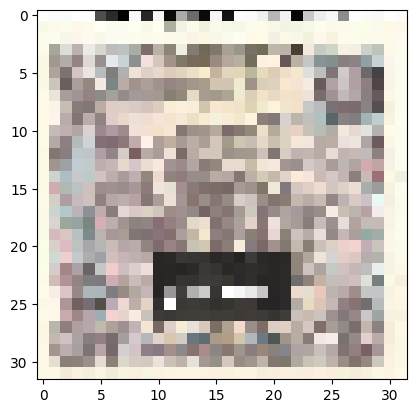

In [7]:
img=load_img('/content/drive/MyDrive/Banknotes/2000/Ảnh chụp màn hình 2025-04-14 014904.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dự đoán: 5000


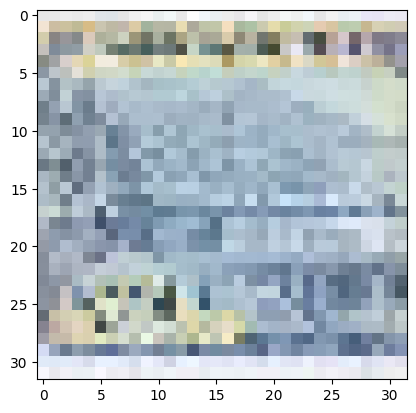

In [8]:
img=load_img('/content/drive/MyDrive/Banknotes/5000/Ảnh chụp màn hình 2025-04-14 015050.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

In [9]:
model.save('trainAI.h5')